In [1]:
# Step 1: Load IMDB reviews dataset
# Hint: Use tf.keras.datasets.imdb.load_data with num_words=10000
import tensorflow as tf
from tensorflow.keras import layers,models
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.datasets import imdb
from sklearn.metrics import classification_report

In [2]:
(train_data,train_labels),(test_data,test_labels) = imdb.load_data(num_words=2000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
# Step 2: Tokenize and pad sequences
# Hint: Use tf.keras.preprocessing.sequence.pad_sequences
# Target sequence length: try 200
train_data = pad_sequences(train_data,maxlen=200)
test_data = pad_sequences(test_data,maxlen=200)

#pad_sequences(): This function takes a list of sequences (in this case, train_data, which is a lists of integers) and
#pads them with zeros to a uniform length.
#like if a a=[1,2,3,0,0] # add two 0 abd b = [7,8,9,6,5] so both have equal values

In [4]:
# Get IMDB word index
word_index = imdb.get_word_index()

# Reverse it so we can decode sequences later (optional)
reverse_word_index = {value: key for key, value in word_index.items()}

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [5]:
# After you fit/prepare tokenizer (or use imdb.get_word_index())
import joblib
joblib.dump(word_index, "word_index.joblib")

['word_index.joblib']

In [6]:
from google.colab import files
files.download("word_index.joblib")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [7]:
# Step 3: Build LSTM model for sentiment classification
# Hint: Use Embedding -> LSTM -> Dense -> sigmoid output
model = models.Sequential()
model.add(layers.Embedding(2000,128))
model.add(layers.LSTM(128))
model.add(layers.Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Step 4: Compile with binary_crossentropy and train
# Hint: Track accuracy and use validation split or test set
model.compile(optimizer='adam',loss = 'binary_crossentropy',metrics=['accuracy'])
history = model.fit(
    train_data, train_labels,
    batch_size=32,
    epochs=10,
    validation_split=0.2,   # use 20% of training data for validation
    verbose=1
)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.6830 - loss: 0.5654 - val_accuracy: 0.8082 - val_loss: 0.4086
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.7938 - loss: 0.4330 - val_accuracy: 0.8146 - val_loss: 0.4271
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.7662 - loss: 0.4820 - val_accuracy: 0.7336 - val_loss: 0.5166
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.7965 - loss: 0.4358 - val_accuracy: 0.8228 - val_loss: 0.4085
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.8723 - loss: 0.3064 - val_accuracy: 0.8648 - val_loss: 0.3187
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9041 - loss: 0.2370 - val_accuracy: 0.8618 - val_loss: 0.3234
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.9154 - loss: 0.2185 - val_accuracy: 0.8646 - val_loss: 0.3212
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.9264 - loss: 0.1960 - val_acc

In [10]:
# Save model in .h5 for max cross-environment compatibility
model.save("sentiment_model.h5")

# Optional: print to confirm
import os
print("Model saved:", os.path.exists("sentiment_model.h5"))
print("Tokenizer saved:", os.path.exists("word_index.joblib"))

Model saved: True
Tokenizer saved: True


In [11]:
# Step 5: Evaluate sentiment predictions
# Hint: Use model.evaluate and possibly classification_report
loss,accuracy = model.evaluate(test_data,test_labels)
print(f"Test accuracy: {accuracy*100:.2f}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8558 - loss: 0.3810
Test accuracy: 86.05


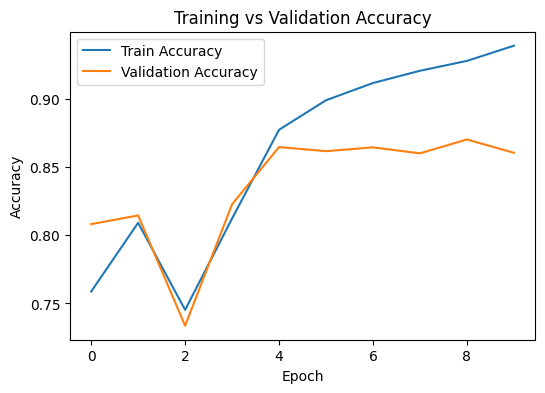

In [12]:
# Plot training & validation accuracy
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('accuracy_plot.png')
plt.show()

In [13]:
#classification_report
import numpy as np
target_names = ['negative', 'positive']
print(classification_report(test_labels, np.round(model.predict(test_data)), target_names=target_names))

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step
              precision    recall  f1-score   support

    negative       0.84      0.90      0.87     12500
    positive       0.89      0.83      0.86     12500

    accuracy                           0.86     25000
   macro avg       0.86      0.86      0.86     25000
weighted avg       0.86      0.86      0.86     25000



In [14]:
from google.colab import files
files.download("sentiment_model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# New Section